In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [2]:
#Importing the Required Libraries
import pandas as pd 

import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
path_datasets = r"/kaggle/input/black-friday"

files = [os.path.join(path_datasets,filename) for filename in os.listdir(path_datasets)]
files

['/kaggle/input/black-friday/train.csv', '/kaggle/input/black-friday/test.csv']

In [4]:
#dataset
df_train = pd.read_csv(files[0])
df_test=pd.read_csv(files[1])

In [5]:
#First look at test
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
#First look at train
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
#First look at train 
print("There are {} rows and {} colums in train data.".format(df_train.shape[0],df_train.shape[1]))
print("There are {} rows and {} colums in train data.".format(df_test.shape[0],df_test.shape[1]))

There are 550068 rows and 12 colums in train data.
There are 233599 rows and 11 colums in train data.


In [8]:
#Check data types in train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
#Check data types in test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [10]:
print(df_train.columns)
print(df_test.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [11]:
#Lets describe train
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
#Lets describe test
df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [13]:
#Check Missing values in train
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
#Check Missing values in test
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Product Category 2 and Product Category 3 has missing values in both train and test dataset.

In [15]:
#Lets concatenate train & test
df=pd.concat([df_train,df_test])
df.shape 

(783667, 12)

# **Data Cleaning**

In [16]:
#Exploring Unique values of each variable
print("Unique Values of Gender: ",df['Gender'].unique())
print("\nUnique Values of City_Category: ",df["City_Category"].unique())
print("\nUnique Values of Age: ",df["Age"].unique())
print("\nUnique Values of Occupation: ",df["Occupation"].unique())
print("\nUnique Values of Marital_Status: ",df["Marital_Status"].unique())
print("\nUnique Values of Product_Category_1: ",df["Product_Category_1"].unique())
print("\nUnique Values of Product_Category_2: ",df["Product_Category_2"].unique())
print("\nUnique Values of Product_Category_3: ",df["Product_Category_3"].unique())

Unique Values of Gender:  ['F' 'M']

Unique Values of City_Category:  ['A' 'C' 'B']

Unique Values of Age:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique Values of Occupation:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique Values of Marital_Status:  [0 1]

Unique Values of Product_Category_1:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique Values of Product_Category_2:  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]

Unique Values of Product_Category_3:  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [17]:
#value count of product category
print("Product Category 1\n",df.Product_Category_1.value_counts())
print("\nProduct Category 2\n",df.Product_Category_2.value_counts())
print("\nProduct Category 3\n",df.Product_Category_3.value_counts())

Product Category 1
 5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

Product Category 2
 8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

Product Category 3
 16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64


In [18]:
#fill the missing values of Product Category 2
df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0],inplace=True)

In [19]:
#fill the missing values of Product Category 3
df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0],inplace=True)

In [20]:
df["Product_Category_2"].hasnans,df["Product_Category_3"].hasnans

(False, False)

In [21]:
#Exploring unique values - Stay_In_Current_City_Years
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [22]:
#Removing "+" symbol
df.Stay_In_Current_City_Years=df_train.Stay_In_Current_City_Years.str.replace("+","")

In [23]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [24]:
#Conveting object to int
df["Stay_In_Current_City_Years"]=df['Stay_In_Current_City_Years'].astype(int)

In [25]:
#Let's drop the column User_ID
df.drop(['User_ID'],axis=1,inplace=True)

In [26]:
#Information of dtype and other
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.7+ MB


In [27]:
df["Product_ID"].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64

In [28]:
df["Purchase"].hasnans

True

# **Data Visualization**

Text(0.5, 1.0, 'Top 5 Product_ID by Puchase')

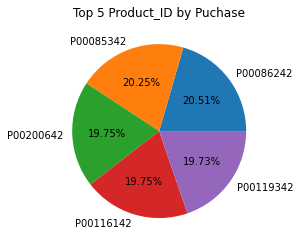

In [29]:
#Top 5 Product_ID by Purchase
df.groupby("Product_ID")["Purchase"].mean().sort_values(ascending=False).head(5).plot(kind="pie",ylabel=" ",autopct='%1.2f%%')
plt.title("Top 5 Product_ID by Puchase")

Product_ID P00086242 is maximum purchased by customers.

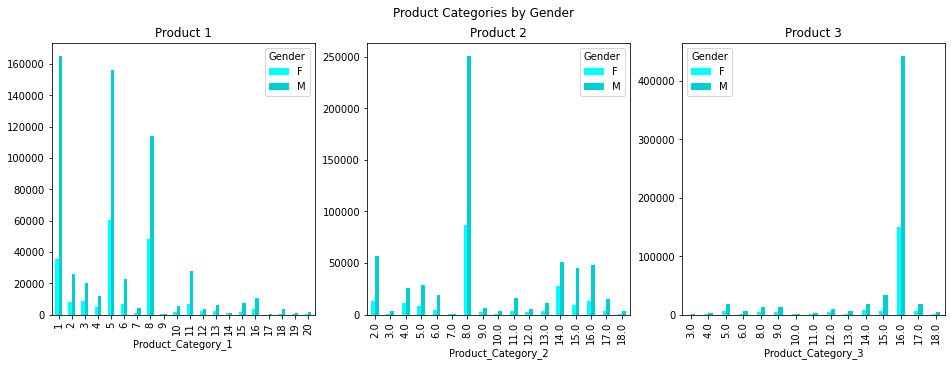

In [30]:
#Bar plot of Product Categories and Gender
fig, axis=plt.subplots(1,3,figsize=(16,5))
color_list=["aqua","darkturquoise"]
pd.crosstab(df["Product_Category_1"],df["Gender"]).plot(kind="bar",ax=axis[0],xlim=[0,1],color=color_list)
axis[0].set_title("Product 1")
pd.crosstab(df["Product_Category_2"],df["Gender"]).plot(kind="bar",ax=axis[1],xlim=[0,1],color=color_list)
axis[1].set_title("Product 2")
pd.crosstab(df["Product_Category_3"],df["Gender"]).plot(kind="bar",ax=axis[2],xlim=[0,1],color=color_list)
axis[2].set_title("Product 3")
plt.suptitle("Product Categories by Gender")
plt.show()

* In product category 1 the maximum purchased product number is 1,5 and 8 which has large male customers.
* In product category 2 the maximum purchased product number is 8 which has large male customers.
* In product category 3 the maximum purchased product number is 16 which has large male customers.

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

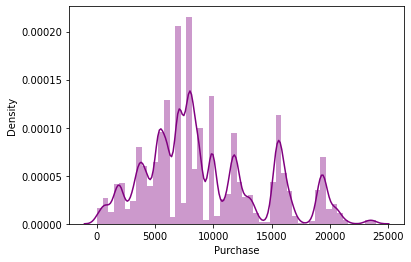

In [31]:
#Distribution Plot of Purchase
sns.distplot(df["Purchase"],color="purple")

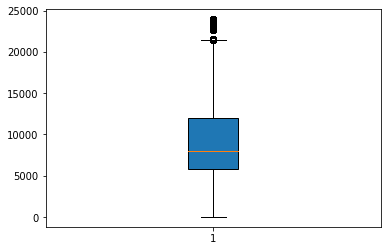

In [32]:
#Box Plot of Purchase
df_na=df.dropna()
box=plt.boxplot(df_na["Purchase"],vert=True,notch=False,patch_artist=True)

In [33]:
#Lets check point which falls outside the whisker
value_point_outside_whisker=[item.get_ydata() for item in box["fliers"]]
value_point_outside_whisker=value_point_outside_whisker[0]

In [34]:
value_point_outside_whisker.max(),value_point_outside_whisker.min()

(23961.0, 21401.0)

In [35]:
grater_point=df[df["Purchase"]>=value_point_outside_whisker.min()]

In [36]:
#Let's drop Outliers
df.drop(grater_point.index).reset_index()

,index,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,4,P00285442,M,55+,16,C,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
779860,233594,P00118942,F,26-35,15,B,1,1,8,8.0,16.0,NaN
779861,233595,P00254642,F,26-35,15,B,2,1,5,8.0,16.0,NaN
779862,233596,P00031842,F,26-35,15,B,2,1,1,5.0,12.0,NaN
779863,233597,P00124742,F,46-50,1,C,2,0,10,16.0,16.0,NaN


<AxesSubplot:xlabel='Purchase'>

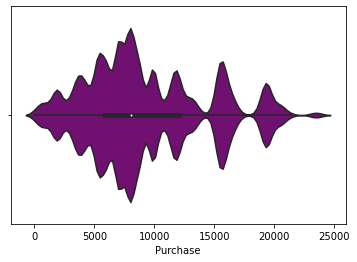

In [37]:
sns.violinplot(df["Purchase"],color="Purple")

Text(0.5, 0.98, 'CountPlot of Variables')

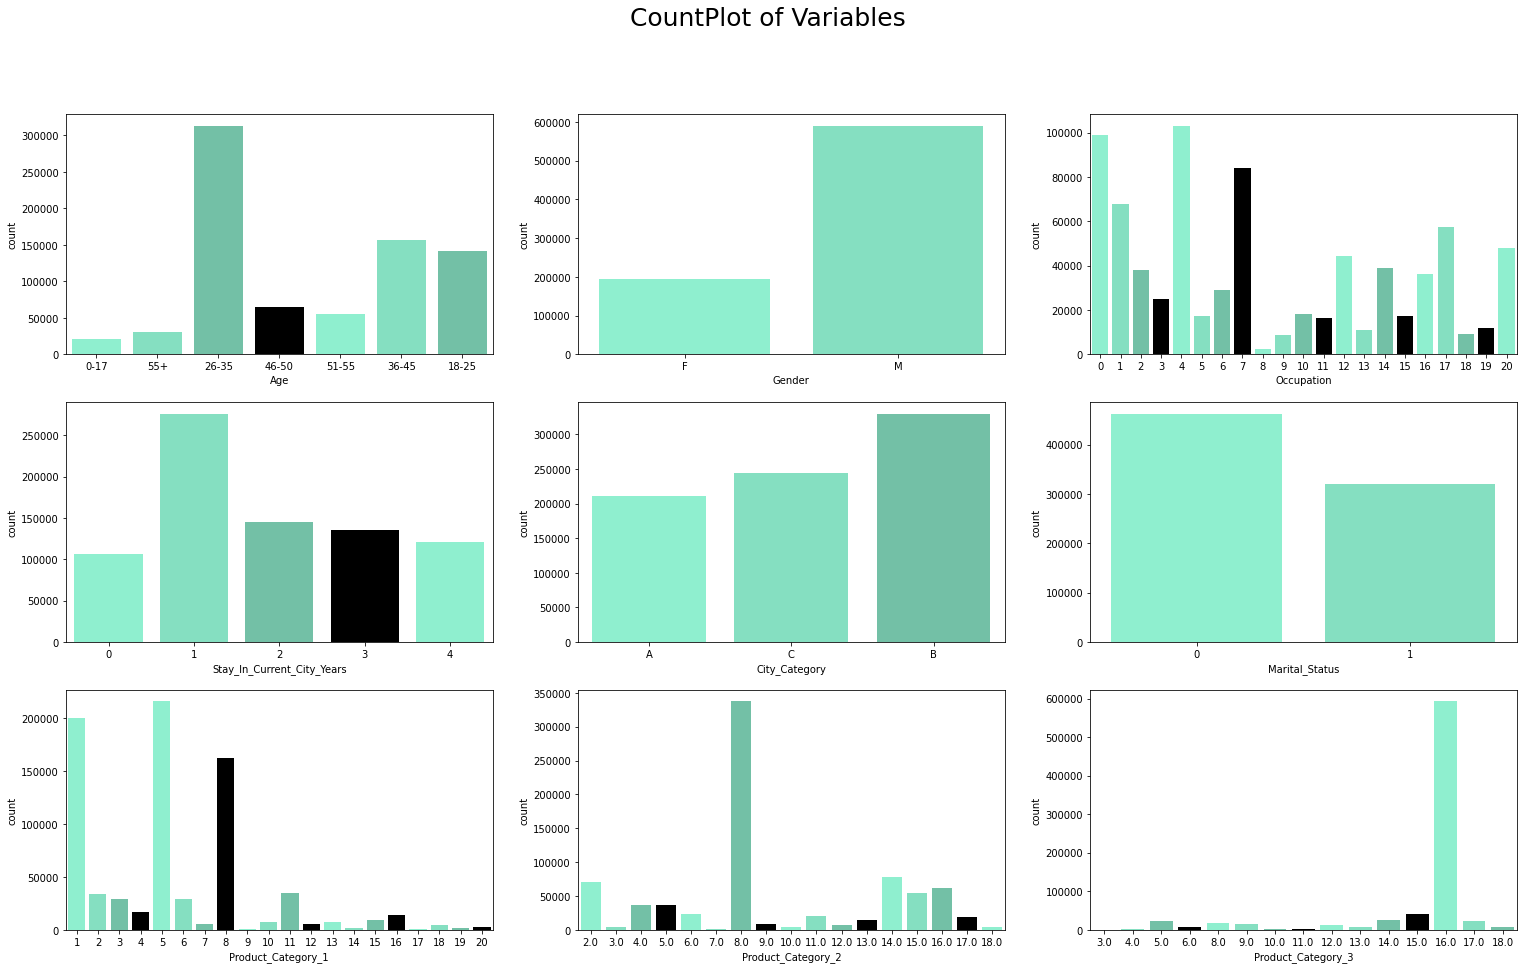

In [38]:
#Countplot of variables
fig,axis=plt.subplots(3,3,figsize=(26,15))
color_list=["#7FFFD4","#76EEC6","#66CDAA","#000000"]*6
sns.set_palette(sns.color_palette(color_list))
sns.countplot(df["Age"],ax=axis[0,0])
sns.countplot(df["Gender"],ax=axis[0,1])
sns.countplot(df["Occupation"],ax=axis[0,2])
sns.countplot(df["Stay_In_Current_City_Years"],ax=axis[1,0])
sns.countplot(df["City_Category"],ax=axis[1,1])
sns.countplot(df["Marital_Status"],ax=axis[1,2])
sns.countplot(df["Product_Category_1"],ax=axis[2,0])
sns.countplot(df["Product_Category_2"],ax=axis[2,1])
sns.countplot(df["Product_Category_3"],ax=axis[2,2])
plt.suptitle("CountPlot of Variables",fontsize=25)

Text(0.5, 0.98, 'Purchase per categories')

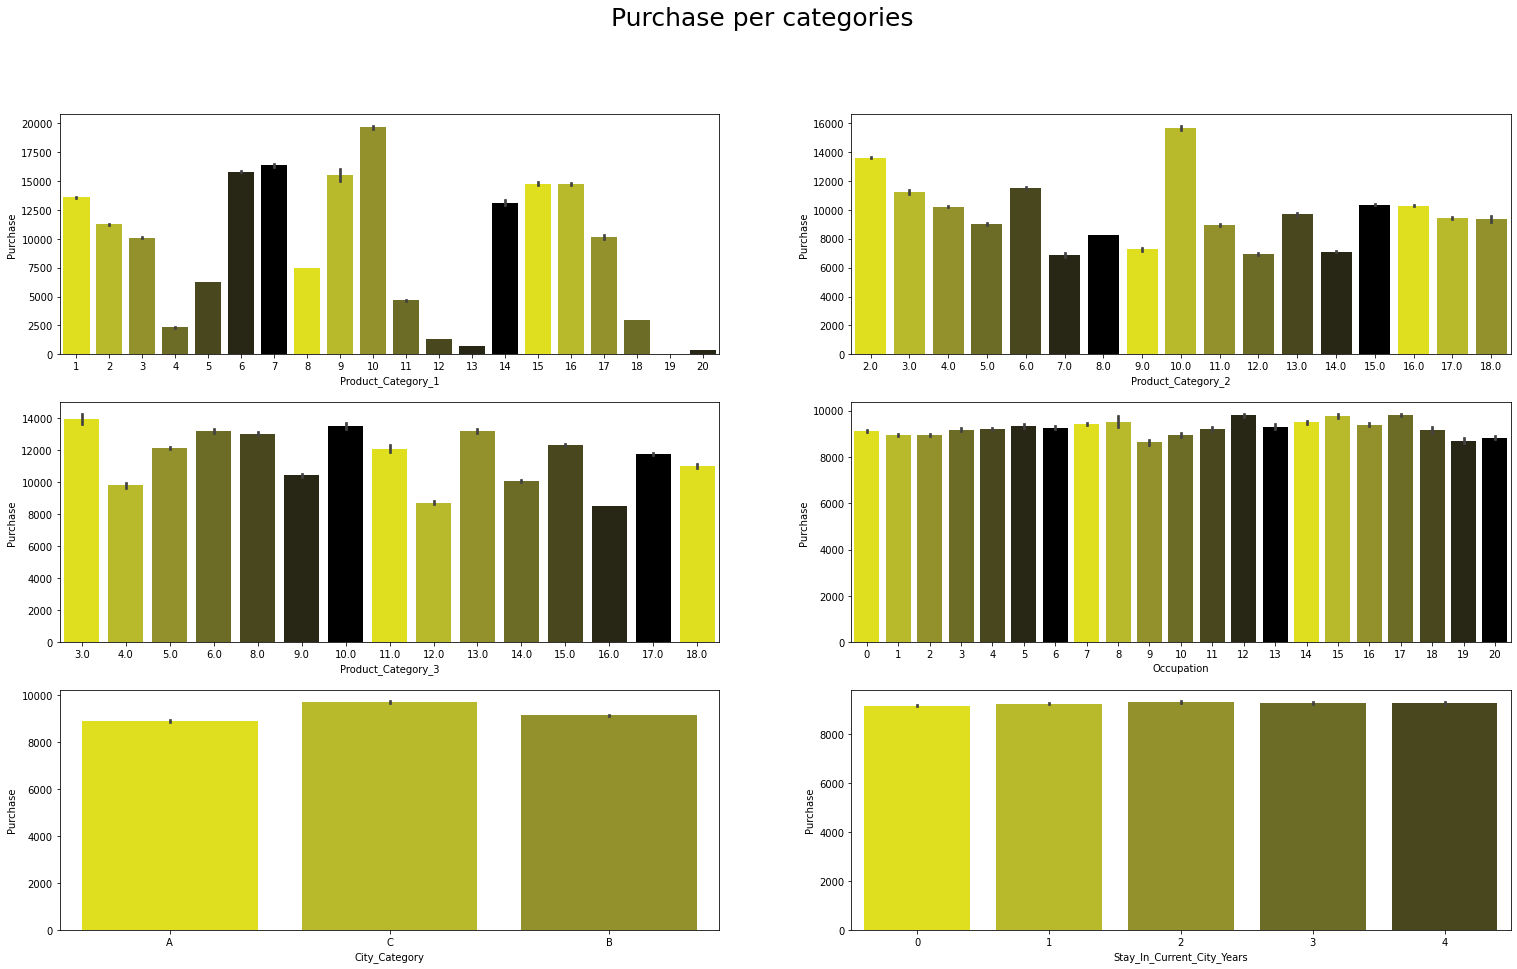

In [39]:
#Barplot of each variable by purchase
fig,axis=plt.subplots(3,2,figsize=(26,15))
list_colors = ["#ffff00","#d0d015","#a3a21b","#78771b","#504e17","#2b2911","#000000"]
sns.barplot(data=df,x=df["Product_Category_1"],y=df["Purchase"],palette=list_colors,ax=axis[0,0])
sns.barplot(data=df,x=df["Product_Category_2"],y=df["Purchase"],palette=list_colors,ax=axis[0,1])
sns.barplot(data=df,x=df["Product_Category_3"],y=df["Purchase"],palette=list_colors,ax=axis[1,0])
sns.barplot(data=df,x=df["Occupation"],y=df["Purchase"],palette=list_colors,ax=axis[1,1])
sns.barplot(data=df,x=df["City_Category"],y=df["Purchase"],palette=list_colors,ax=axis[2,0])
sns.barplot(data=df,x=df["Stay_In_Current_City_Years"],y=df["Purchase"],palette=list_colors,ax=axis[2,1])
plt.suptitle("Purchase per categories",fontsize=25)

Text(0.5, 1.0, 'Correlation Heatmap')

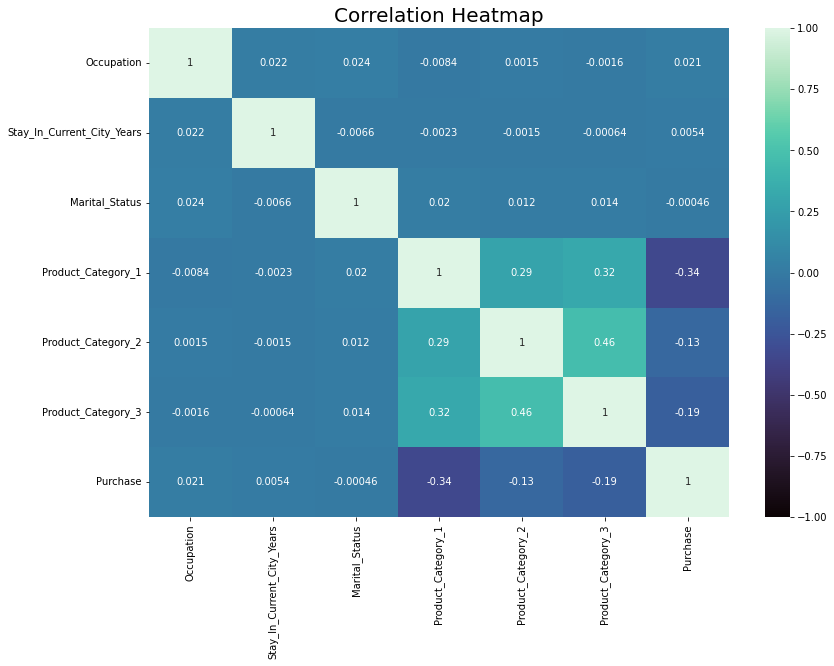

In [40]:
#To Check correlation 
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="mako")
plt.title("Correlation Heatmap",fontsize=20)

# **Data Preparation**

In [41]:
#convert Object type to category type
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')

In [42]:
#Label and OneHotEncoding
enc=OneHotEncoder
label_enc=LabelEncoder()
df["Age"]=label_enc.fit_transform(df.Age)
df["Gender"]=label_enc.fit_transform(df.Gender)
df["City_Category"]=label_enc.fit_transform(df.City_Category)

In [43]:
#Let's Drop Product_ID
df.drop("Product_ID",axis=1,inplace=True)

In [44]:
#Let's Normalize data
std_scale=StandardScaler().fit(df)
df=pd.DataFrame(std_scale.transform(df))
df.set_axis(["Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category_1","Product_Category_2","Product_Category_3","Purchase"],inplace=True,axis=1)

In [45]:
# Segregating train and test from df
train1=df[:df_train.shape[0]]
test1=df[df_train.shape[0]:]

In [46]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(train1.shape[0],train1.shape[1]))
print('There are {} rows and {} columns in test'.format(test1.shape[0],test1.shape[1]))

There are 550068 rows and 10 columns in train
There are 233599 rows and 10 columns in test


# **Preparing a Model**

In [47]:
#Fitting Regression Model
model=smf.ols("Purchase~Gender+Age+Occupation+City_Category+Stay_In_Current_City_Years+Marital_Status+Product_Category_1+Product_Category_2+Product_Category_3",data=df_train).fit()

In [48]:
#Regression model parameter value
model.params

Intercept                           11469.092934
Gender[T.M]                           319.925227
Age[T.18-25]                          414.022514
Age[T.26-35]                          533.391444
Age[T.36-45]                          668.706288
Age[T.46-50]                          687.862193
Age[T.51-55]                         1040.773098
Age[T.55+]                            900.211598
City_Category[T.B]                    209.118510
City_Category[T.C]                    837.073958
Stay_In_Current_City_Years[T.1]       115.459813
Stay_In_Current_City_Years[T.2]       212.938441
Stay_In_Current_City_Years[T.3]        66.808870
Stay_In_Current_City_Years[T.4+]      148.510845
Occupation                              7.643229
Marital_Status                        -39.823226
Product_Category_1                   -827.613566
Product_Category_2                     25.320631
Product_Category_3                     73.051732
dtype: float64

The regression equation:
Purchase=(1.214306e-17)+(4.472397e-02)*Gender+(3.299776e-02)*Age+(8.469732e-03)*Occupation+(5.146503e-02)*City_Category+(2.248841e-03)*Stay_In_Current_City_Years-(4.982603e-03)*Marital_Status-(3.153464e-01)*Product_category_1-(2.056736e-03)*Product_Category2-(8.445025e-02)=Product_Category_3

In [49]:
#tvalue and p value
print(model.tvalues, '\n', model.pvalues)

Intercept                           134.649237
Gender[T.M]                          11.639301
Age[T.18-25]                          5.765374
Age[T.26-35]                          7.640711
Age[T.36-45]                          9.307545
Age[T.46-50]                          8.628948
Age[T.51-55]                         12.731556
Age[T.55+]                            9.867011
City_Category[T.B]                    7.235796
City_Category[T.C]                   27.512336
Stay_In_Current_City_Years[T.1]       3.162789
Stay_In_Current_City_Years[T.2]       5.255679
Stay_In_Current_City_Years[T.3]       1.620531
Stay_In_Current_City_Years[T.4+]      3.491891
Occupation                            4.307294
Marital_Status                       -1.614035
Product_Category_1                 -161.866744
Product_Category_2                    7.497540
Product_Category_3                   22.235781
dtype: float64 
 Intercept                            0.000000e+00
Gender[T.M]                          2.6

In [50]:
#R-square and Adj R-square
model.rsquared,model.rsquared_adj

(0.1699318719454218, 0.16984229732218603)

R-Square and Adj R-Square are very low, so we can say that the model is poorly fit.

In [51]:
#Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     1897.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:00:04   Log-Likelihood:            -1.6447e+06
No. Observations:              166821   AIC:                         3.290e+06
Df Residuals:                  166802   BIC:                         3.290e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.147e+04     85.178    134.649      0.000    1.13e+04    1.16e+04
Gender[T.M]                        319.9252     27.487     11.639      0.000     266.052     373.798
Age[T.18-25]                       414.0225     71.812      5.765      0.000     273.273     554.772
Age[T.26-35]                       533.3914     69.809      7.641      0.000     396.567     670.216
Age[T.36-45]                       668.7063     71.846      9.308      0.000     527.890     809.522
Age[T.46-50]                       687.8622     79.716      8.629      0.000     531.621     844.103
Age[T.51-55]                      1040.7731     81.748     12.732      0.000     880.550    1200.996
Age[T.55+]                         900.2116     91.234      9.867      0.000     721.394    1079.029
City_Category[T.B]                 209.1185     28.901      7.236      0.000     152.474     265.763
City_Category[T.C]                 837.0740     30.425     27.512      0.000     777.441     896.707
Stay_In_Current_City_Years[T.1]    115.4598     36.506      3.163      0.002      43.909     187.010
Stay_In_Current_City_Years[T.2]    212.9384     40.516      5.256      0.000     133.528     292.349
Stay_In_Current_City_Years[T.3]     66.8089     41.227      1.621      0.105     -13.994     147.612
Stay_In_Current_City_Years[T.4+]   148.5108     42.530      3.492      0.000      65.153     231.869
Occupation                           7.6432      1.774      4.307      0.000       4.165      11.121
Marital_Status                     -39.8232     24.673     -1.614      0.107     -88.182       8.535
Product_Category_1                -827.6136      5.113   -161.867      0.000    -837.635    -817.592
Product_Category_2                  25.3206      3.377      7.498      0.000      18.701      31.940
Product_Category_3                  73.0517      3.285     22.236      0.000      66.613      79.491
==============================================================================
Omnibus:                     2057.705   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2200.937
Skew:                           0.252   Prob(JB):                         0.00
Kurtosis:                       3.251   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Residual Analysis**

In [52]:
#Error residual of the model
residuals = model.resid
residuals

1         3094.501865
6         5685.552388
13        3525.802876
14       -4403.336376
16        1647.943406
             ...     
545902   -2922.823871
545904    7443.066164
545907   -8516.578013
545908    2584.870391
545914   -1176.922680
Length: 166821, dtype: float64

<AxesSubplot:ylabel='Density'>

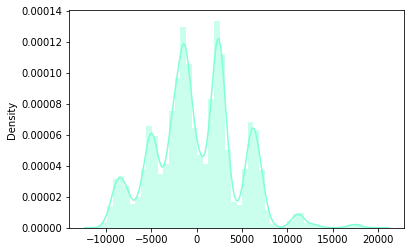

In [53]:
#Check the distribuion plot of residuals
sns.distplot(residuals)

In [54]:
#Expected mean value residual assume to be zero
#let's check mean of residual
residuals.mean()

5.556247668974859e-12

# **Test for Normality of Residuals (Q-Q Plot)**

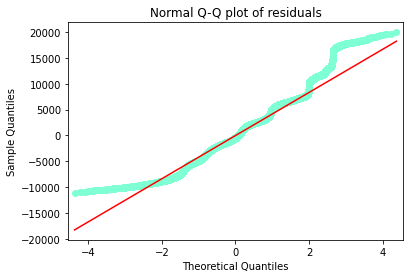

In [55]:
#Normal Probability Plot
qqplot=sm.qqplot(model.resid, line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

From above plot we can say that the residuals does not follow normal distribution.

In [56]:
#Predicted values by model
predictions = model.fittedvalues
predictions

1         12105.498135
6         13529.447612
13        12139.197124
14         9781.336376
16        11407.056594
              ...     
545902    10969.823871
545904     9049.933836
545907    11941.578013
545908    13109.129609
545914    12816.922680
Length: 166821, dtype: float64

# **Residual Plot for Homoscedasticity**

In [57]:
#Standardization of residuals and predicted values
residuals=residuals.values.reshape(-1,1)
predictions=predictions.values.reshape(-1,1)
std_scale=StandardScaler().fit(residuals)
residual=pd.DataFrame(std_scale.transform(residuals))

std_scale=StandardScaler().fit(predictions)
prediction=pd.DataFrame(std_scale.transform(predictions))

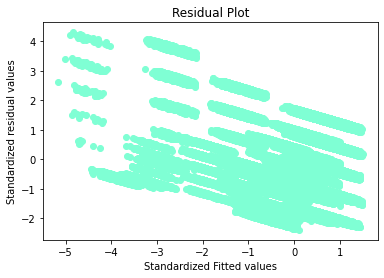

In [58]:
plt.scatter(prediction,residual)

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# **Residual Vs Regressors**

eval_env: 1


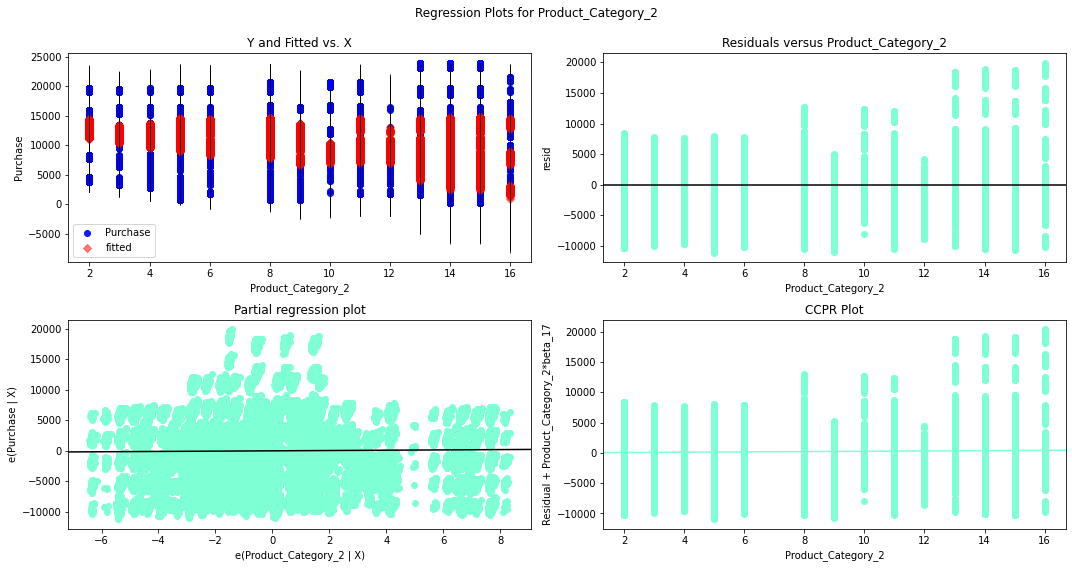

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Product_Category_2", fig=fig)
plt.show()

eval_env: 1


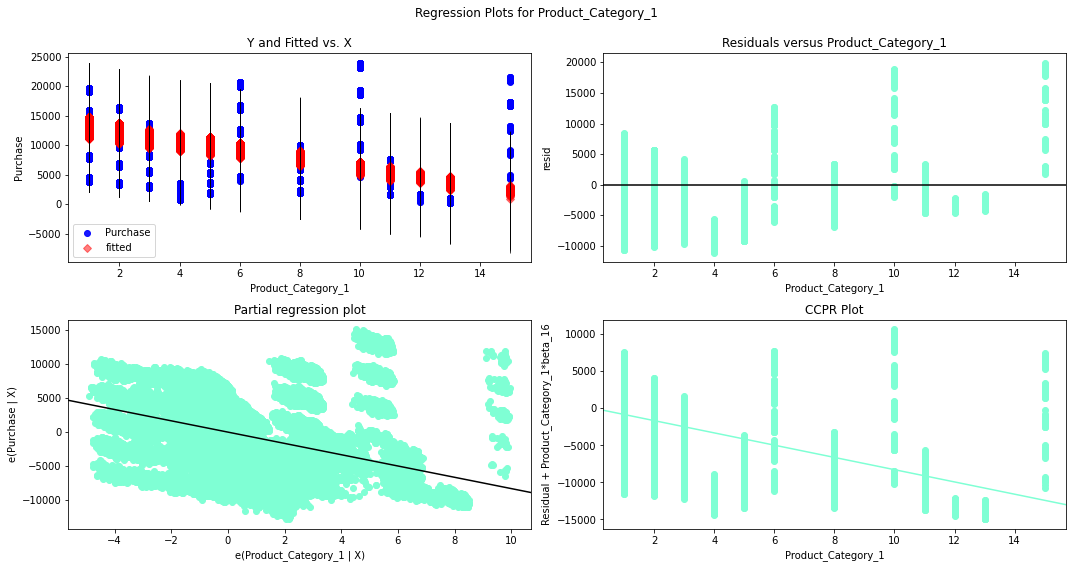

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Product_Category_1", fig=fig)
plt.show()

eval_env: 1


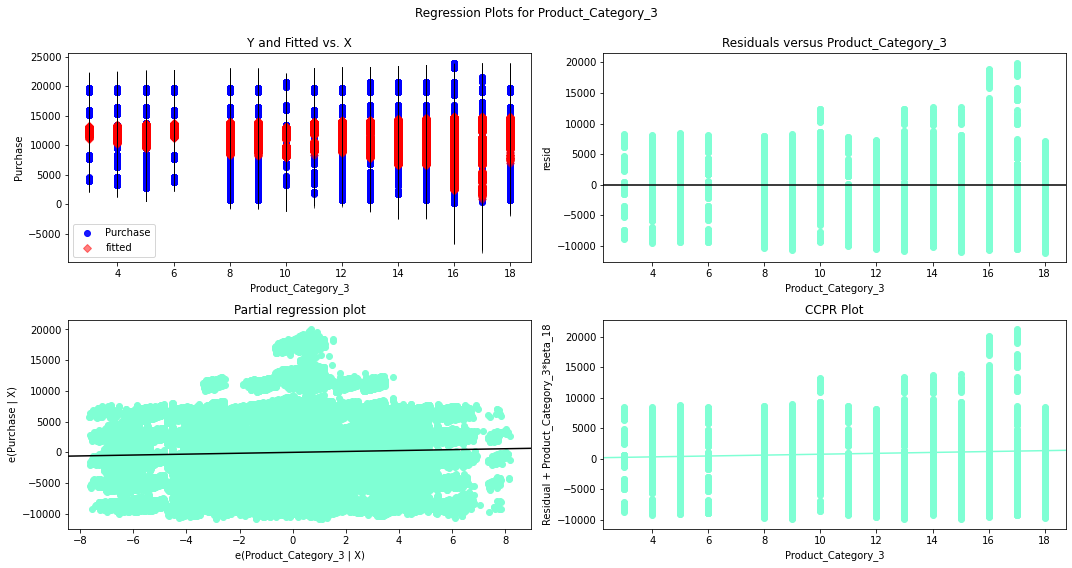

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Product_Category_3", fig=fig)
plt.show()

# **Detecting Influencers/Outliers**

# **Cook’s Distance**

In [62]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [63]:
c

array([6.52274345e-06, 1.00220672e-05, 2.96174304e-06, ...,
       1.08183261e-05, 1.21352872e-06, 2.14425833e-07])

In [64]:
#index and value of influencer 
(np.argmax(c), np.max(c))

(48372, 0.0003393947130407625)

From above analysis we see,
* Linear Regression model poorfit to the data.
* Variables are dependent on each other that is Multicollinearity present in the data.
* Residual of the model is not normally distributed.
* Homoskedasticity present in the data.
* Residual vs regressor plot shows some pattern.
* Mutiple influncing points are present in the data.

* We can get good accuracy or a good model using XGBRegression or using Hypertuning but not using Linear Regression.

# **Thank You!**